#Install package of Dwave

In [1]:
!pip install dwave-system

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


# Set up API Token:

- Use VPN change location to USA and go to https://cloud.dwavesys.com/leap to take API token
- Explore Dev Access
- My API: DEV-76d07a9aba2a6f51d2aea78fbf2916810081e4e5

(Guide:
https://youtu.be/bErs0dxC1aY?si=eIRuHje3oTeQ86v4 and
https://docs.ocean.dwavesys.com/en/stable/getting_started.html)

In [2]:
!dwave setup

Optionally install non-open-source packages and configure your environment.

Do you want to select non-open-source packages to install (y/n)? [y]: y

D-Wave Drivers
These drivers enable some automated performance-tuning features.
This package is available under the D-Wave EULA license.
The terms of the license are available online: https://docs.ocean.dwavesys.com/eula
Install (y/n)? [y]: y
Installing: D-Wave Drivers

Creating the D-Wave configuration file.
Using the simplified configuration flow.
Try 'dwave config create --full' for more options.

Creating new configuration file: /root/.config/dwave/dwave.conf
Profile [defaults]: y
Creating new profile: y
Authentication token [skip]: DEV-76d07a9aba2a6f51d2aea78fbf2916810081e4e5
Configuration saved.


# Clone and test demo Maximum Cut Prob

In [3]:
!git clone https://github.com/dwave-examples/maximum-cut.git

Cloning into 'maximum-cut'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 311 (delta 34), reused 27 (delta 27), pack-reused 251
Receiving objects: 100% (311/311), 786.13 KiB | 5.66 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [4]:
%cd maximum-cut

/content/maximum-cut


# Run max_cut

In [9]:
!python maximum_cut.py

------------------------------------------------------------
          Set 0          Set 1    Energy        Cut Size    
------------------------------------------------------------
         [2, 3]      [1, 4, 5]     -5.0             5       
         [1, 4]      [2, 3, 5]     -5.0             5       
      [2, 3, 5]         [1, 4]     -5.0             5       

Your plot is saved to maxcut_plot.png
Res:  {1: [1], 2: [2], 3: [3], 4: [4], 5: [5]}


# Run max_cut_ising

In [ ]:
!python maximum_cut_ising.py

# Show topology after embedding

## Find embedding as dictionary (python)

Use this code in ***maximum_cut.py*** and run ***maximum_cut_ising.py*** to get embedding

In [7]:
import minorminer
embedding = minorminer.find_embedding(Q, G)
print("The embedding is: ", embedding)

NameError: ignored

## Zephyr graph

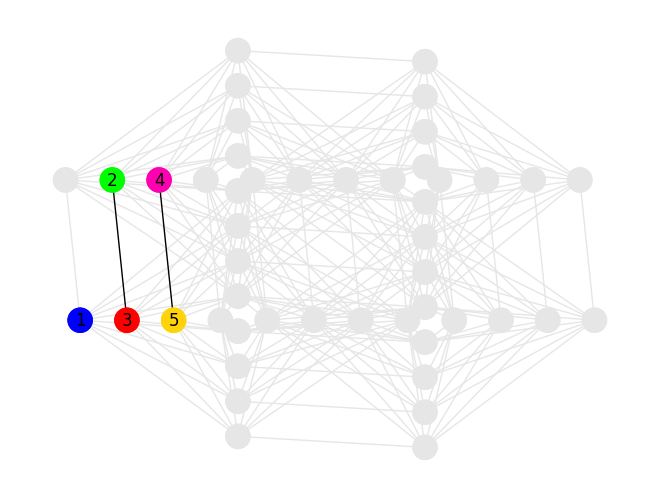

In [11]:
import dwave_networkx as dnx
import matplotlib.pyplot as plt
import networkx as nx

G = dnx.zephyr_graph(1)
#Set fixed embedding which is taken from the code above
embedding = {1: [1], 2: [2], 3: [3], 4: [4], 5: [5]}

plt.ion()
dnx.draw_zephyr_embedding(G, embedding, show_labels=True)

## Pegasus graph

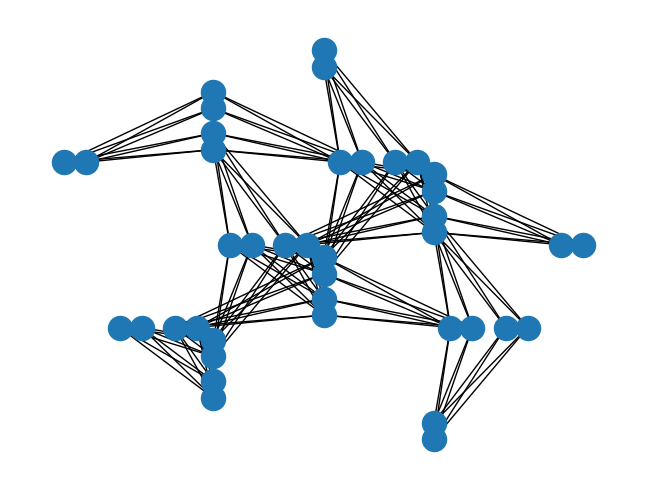

In [12]:
import networkx as nx
import dwave_networkx as dnx
import matplotlib.pyplot as plt
G = dnx.pegasus_graph(2)
dnx.draw_pegasus(G)
plt.show()

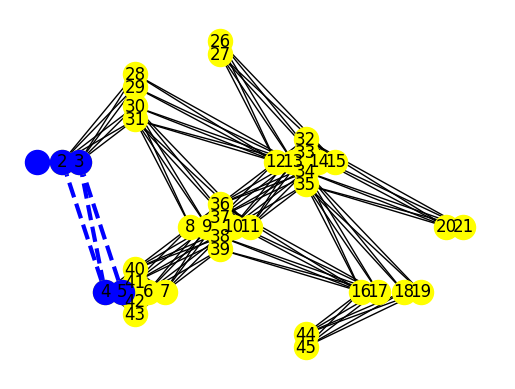

In [13]:
import dwave_networkx as dnx
import matplotlib.pyplot as plt
G = dnx.pegasus_graph(2)
H = dnx.pegasus_graph(2, node_list=[1, 2, 3, 4, 5],
              edge_list=[(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 5)])
# Show graph H on a small Pegasus lattice
f, axes = plt.subplots(1, 1)
dnx.draw_pegasus(G, with_labels=True, crosses=True, node_color="Yellow", ax=axes)
dnx.draw_pegasus(H, crosses=True, node_color='b', style='dashed',
          edge_color='b', width=3, ax=axes)
plt.show()

## Chimera Graph

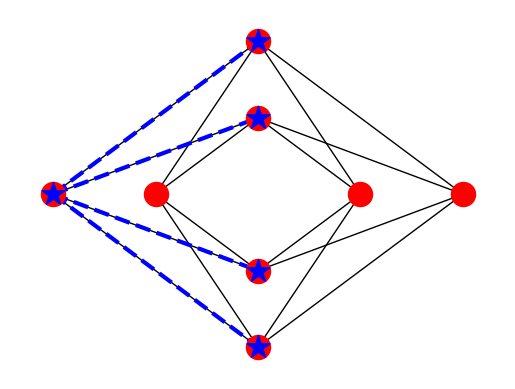

In [ ]:
import networkx as nx
import dwave_networkx as dnx
import matplotlib.pyplot as plt
H = nx.Graph()
#H.add_nodes_from([1, 2, 3, 4, 5])
#H.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 5)])
H.add_nodes_from([0, 4, 5, 6, 7])
H.add_edges_from([(0, 4), (0, 5), (0, 6), (0, 7)])
pos=dnx.chimera_layout(H)
pos
# Show graph H on a Chimera unit cell
f, axes = plt.subplots(1, 1)
G=dnx.chimera_graph(1, 1, 4)  # Draw a Chimera unit cell
dnx.draw_chimera(G, node_color='r', ax=axes)
dnx.draw_chimera(H, node_color='b', node_shape='*', style='dashed', edge_color='b', width=3, ax=axes)
plt.show()
# matplotlib commands to add labels to graphic not shown